In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('housing.csv')

In [ ]:
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

X = data.drop(['median_house_value'],axis=1)
Y = data['median_house_value']


In [ ]:
X_train ,X_test , Y_train , Y_test  = train_test_split(X,Y,test_size=0.2)


In [ ]:
train_data = X_train.join(Y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13566,-117.28,34.16,26.0,2469.0,532.0,1068.0,501.0,1.9832,INLAND,122100.0
3930,-118.58,34.21,24.0,2642.0,696.0,1649.0,633.0,3.0187,<1H OCEAN,217700.0
5786,-118.24,34.15,17.0,5282.0,1605.0,4116.0,1574.0,3.0520,<1H OCEAN,209800.0
11228,-117.94,33.81,24.0,4602.0,1131.0,3003.0,1014.0,3.6771,<1H OCEAN,172200.0
11791,-121.19,38.87,20.0,3118.0,500.0,1405.0,519.0,6.0000,INLAND,209400.0
...,...,...,...,...,...,...,...,...,...,...
15891,-122.38,37.73,38.0,1388.0,276.0,871.0,265.0,2.1667,NEAR BAY,193800.0
13642,-117.33,34.06,42.0,530.0,123.0,390.0,124.0,1.0469,INLAND,67000.0
7077,-117.99,33.94,34.0,1519.0,301.0,758.0,304.0,4.3125,<1H OCEAN,214000.0
3856,-118.43,34.17,33.0,1679.0,404.0,933.0,412.0,2.6979,<1H OCEAN,266000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

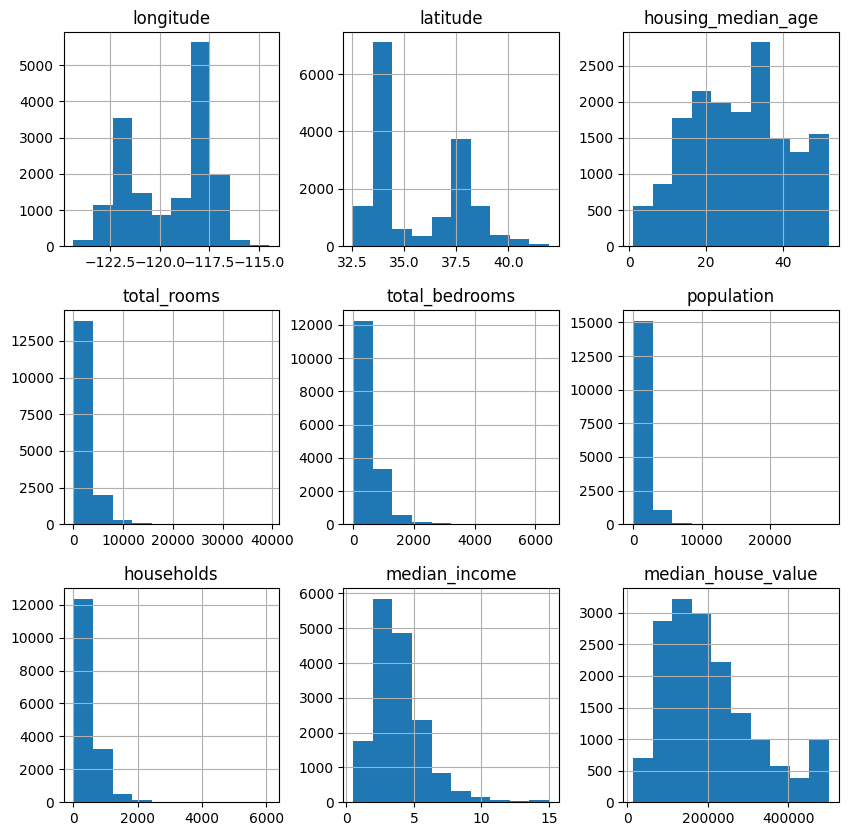

In [ ]:
train_data.hist(figsize=(10,10))

In [ ]:
train_data.corr()

<ipython-input-16-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925144,-0.107627,0.043365,0.065906,0.097495,0.053810,-0.012928,-0.042407
latitude,-0.925144,1.000000,0.011058,-0.034301,-0.063033,-0.105846,-0.068588,-0.081097,-0.146443
housing_median_age,-0.107627,0.011058,1.000000,-0.361635,-0.320268,-0.298989,-0.301684,-0.120621,0.101460
total_rooms,0.043365,-0.034301,-0.361635,1.000000,0.929429,0.861370,0.917757,0.198144,0.135228
total_bedrooms,0.065906,-0.063033,-0.320268,0.929429,1.000000,0.881355,0.979719,-0.006721,0.052162
population,0.097495,-0.105846,-0.298989,0.861370,0.881355,1.000000,0.910829,0.006808,-0.022620
households,0.053810,-0.068588,-0.301684,0.917757,0.979719,0.910829,1.000000,0.013828,0.067611
median_income,-0.012928,-0.081097,-0.120621,0.198144,-0.006721,0.006808,0.013828,1.000000,0.685536
median_house_value,-0.042407,-0.146443,0.101460,0.135228,0.052162,-0.022620,0.067611,0.685536,1.000000


<ipython-input-17-34cc68dae82d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')


<Axes: >

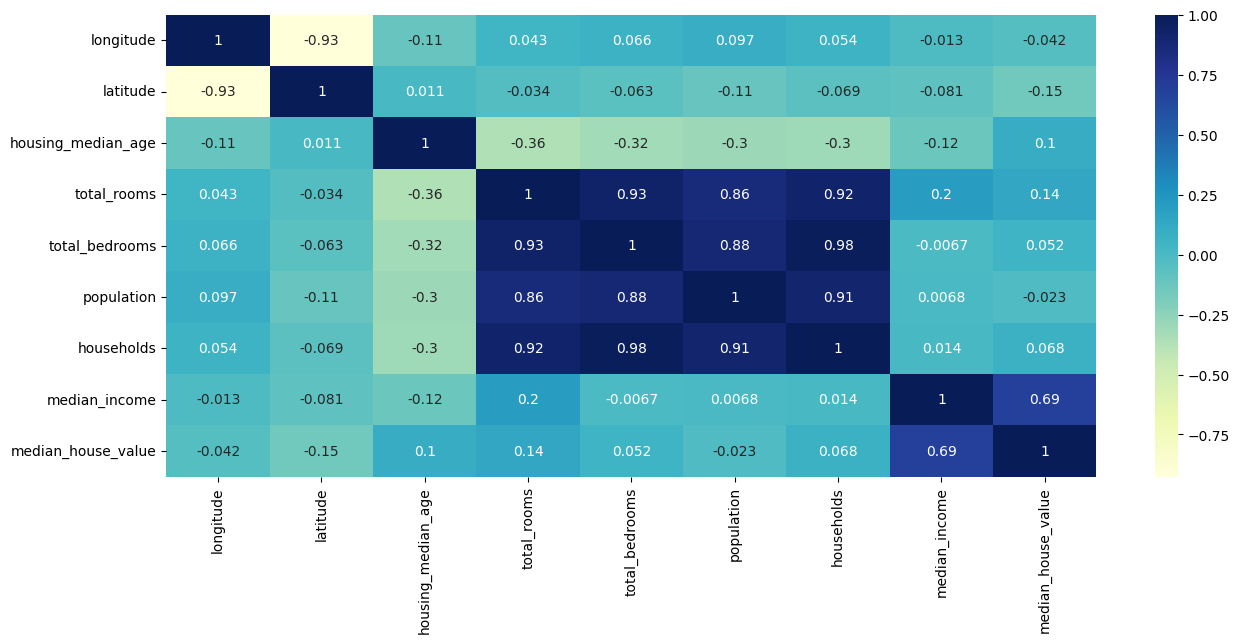

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [ ]:
train_data['total_rooms'] =np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] =np.log(train_data['total_rooms'] + 1)
train_data['population'] =np.log(train_data['total_rooms'] + 1)
train_data['households'] =np.log(train_data['total_rooms'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

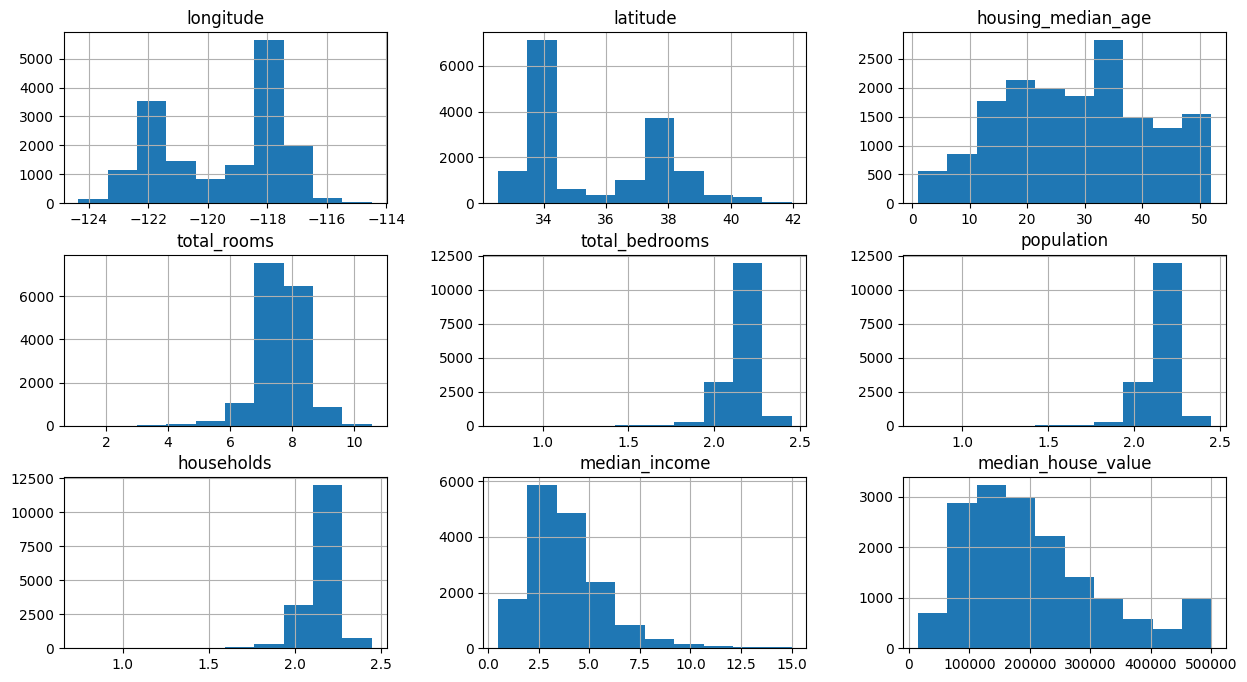

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7245
INLAND        5203
NEAR OCEAN    2102
NEAR BAY      1794
ISLAND           2
Name: ocean_proximity, dtype: int64

In [ ]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13566,-117.28,34.16,26.0,7.811973,2.176111,2.176111,2.176111,1.9832,122100.0,0,1,0,0,0
3930,-118.58,34.21,24.0,7.879670,2.183764,2.183764,2.183764,3.0187,217700.0,1,0,0,0,0
5786,-118.24,34.15,17.0,8.572249,2.258868,2.258868,2.258868,3.0520,209800.0,1,0,0,0,0
11228,-117.94,33.81,24.0,8.434464,2.244369,2.244369,2.244369,3.6771,172200.0,1,0,0,0,0
11791,-121.19,38.87,20.0,8.045268,2.202242,2.202242,2.202242,6.0000,209400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891,-122.38,37.73,38.0,7.236339,2.108556,2.108556,2.108556,2.1667,193800.0,0,0,0,1,0
13642,-117.33,34.06,42.0,6.274762,1.984411,1.984411,1.984411,1.0469,67000.0,0,1,0,0,0
7077,-117.99,33.94,34.0,7.326466,2.119439,2.119439,2.119439,4.3125,214000.0,1,0,0,0,0
3856,-118.43,34.17,33.0,7.426549,2.131387,2.131387,2.131387,2.6979,266000.0,1,0,0,0,0


In [ ]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13566,-117.28,34.16,26.0,7.811973,2.176111,2.176111,2.176111,1.9832,INLAND,122100.0
3930,-118.58,34.21,24.0,7.879670,2.183764,2.183764,2.183764,3.0187,<1H OCEAN,217700.0
5786,-118.24,34.15,17.0,8.572249,2.258868,2.258868,2.258868,3.0520,<1H OCEAN,209800.0
11228,-117.94,33.81,24.0,8.434464,2.244369,2.244369,2.244369,3.6771,<1H OCEAN,172200.0
11791,-121.19,38.87,20.0,8.045268,2.202242,2.202242,2.202242,6.0000,INLAND,209400.0
...,...,...,...,...,...,...,...,...,...,...
15891,-122.38,37.73,38.0,7.236339,2.108556,2.108556,2.108556,2.1667,NEAR BAY,193800.0
13642,-117.33,34.06,42.0,6.274762,1.984411,1.984411,1.984411,1.0469,INLAND,67000.0
7077,-117.99,33.94,34.0,7.326466,2.119439,2.119439,2.119439,4.3125,<1H OCEAN,214000.0
3856,-118.43,34.17,33.0,7.426549,2.131387,2.131387,2.131387,2.6979,<1H OCEAN,266000.0


<ipython-input-25-b727c2f9702f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')


<Axes: >

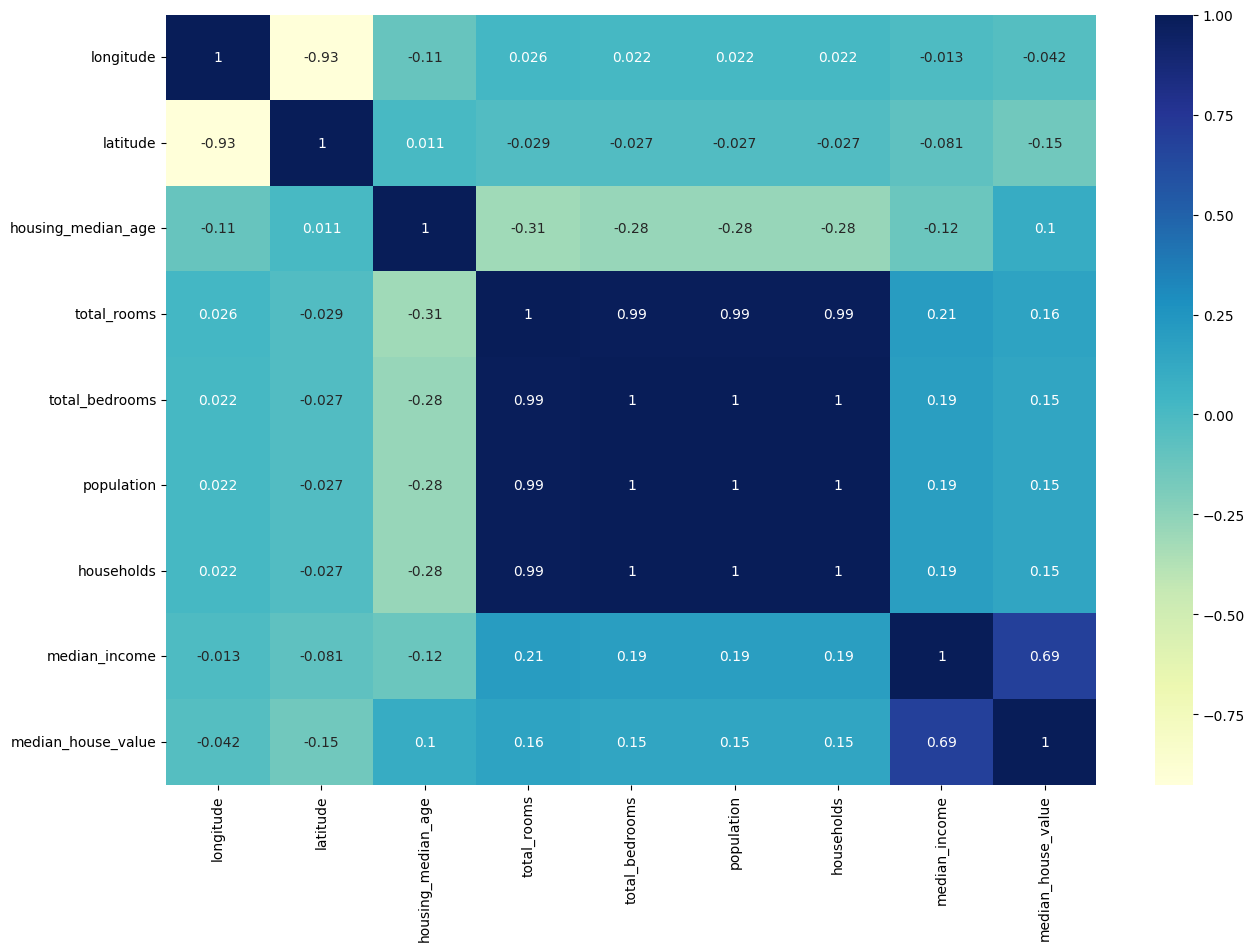

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

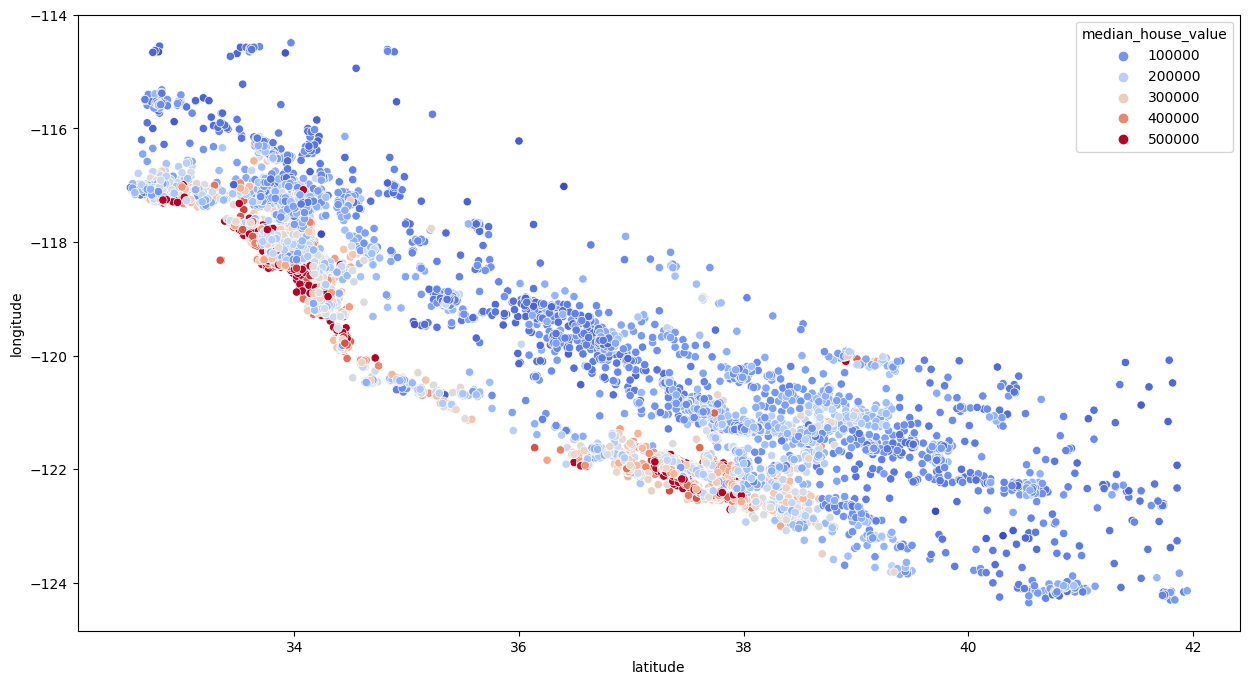

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y ='longitude',data=train_data, hue="median_house_value",palette = "coolwarm")

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


In [ ]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

<Axes: >

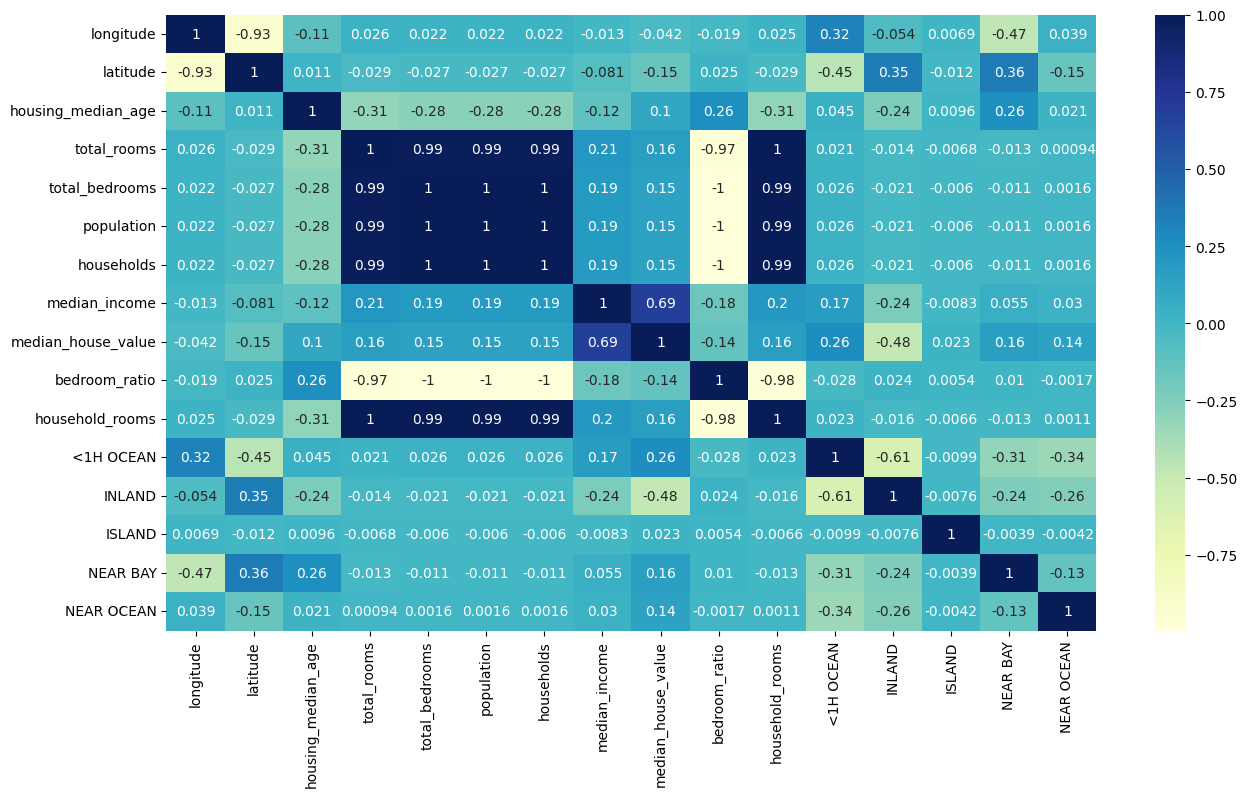

In [ ]:

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [ ]:
from sklearn.linear_model import LinearRegression
X_train , Y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(Y_test)
test_data['total_rooms'] =np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] =np.log(test_data['total_rooms'] + 1)
test_data['population'] =np.log(test_data['total_rooms'] + 1)
test_data['households'] =np.log(test_data['total_rooms'] + 1)
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [ ]:
X_test , Y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']


reg.fit(X_test,Y_test)

LinearRegression()

In [ ]:
reg.score(X_test,Y_test)

0.6315486523034761

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_train,Y_train)

0.9746749791280502

In [ ]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest , param_grid , cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_train , Y_train)

0.9707839309461815